In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_df=pd.read_csv('test.csv')

In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_df.shape

(1459, 80)

In [8]:
# To view the no of missing values for each column alomg with its dtypes

pd.set_option('display.max_rows', None)  # Show all rows

a=test_df.isnull().mean()*100
b=test_df.dtypes

# Create a new DataFrame to combine the information
summary_df = pd.DataFrame({'Null %': a, 'Data Types': b})

print(summary_df)

                  Null % Data Types
Id              0.000000      int64
MSSubClass      0.000000      int64
MSZoning        0.274160     object
LotFrontage    15.558602    float64
LotArea         0.000000      int64
Street          0.000000     object
Alley          92.666210     object
LotShape        0.000000     object
LandContour     0.000000     object
Utilities       0.137080     object
LotConfig       0.000000     object
LandSlope       0.000000     object
Neighborhood    0.000000     object
Condition1      0.000000     object
Condition2      0.000000     object
BldgType        0.000000     object
HouseStyle      0.000000     object
OverallQual     0.000000      int64
OverallCond     0.000000      int64
YearBuilt       0.000000      int64
YearRemodAdd    0.000000      int64
RoofStyle       0.000000     object
RoofMatl        0.000000     object
Exterior1st     0.068540     object
Exterior2nd     0.068540     object
MasVnrType      1.096642     object
MasVnrArea      1.028101    

In [9]:
# filtering the non null value columns

sd1=summary_df[summary_df['Null %']!=0]
sd1

,Null %,Data Types
MSZoning,0.274160,object
LotFrontage,15.558602,float64
Alley,92.666210,object
Utilities,0.137080,object
Exterior1st,0.068540,object
Exterior2nd,0.068540,object
MasVnrType,1.096642,object
MasVnrArea,1.028101,float64
BsmtQual,3.015764,object
BsmtCond,3.084304,object


In [10]:
sd1.count()

Null %        33
Data Types    33
dtype: int64

In [11]:
sd1[sd1['Data Types']=='float64']

,Null %,Data Types
LotFrontage,15.558602,float64
MasVnrArea,1.028101,float64
BsmtFinSF1,0.068540,float64
BsmtFinSF2,0.068540,float64
BsmtUnfSF,0.068540,float64
TotalBsmtSF,0.068540,float64
BsmtFullBath,0.137080,float64
BsmtHalfBath,0.137080,float64
GarageYrBlt,5.346127,float64
GarageCars,0.068540,float64


In [13]:
columns_to_fill = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
                  'GarageYrBlt','GarageCars','GarageArea']

# Fill the specified columns with their respective modes
for column in columns_to_fill:
    test_df[column].fillna(test_df[column].mean(),inplace=True)


In [15]:

sd2=sd1[sd1['Data Types']=='object']
sd2[sd2['Null %']<50]

,Null %,Data Types
MSZoning,0.274160,object
Utilities,0.137080,object
Exterior1st,0.068540,object
Exterior2nd,0.068540,object
MasVnrType,1.096642,object
BsmtQual,3.015764,object
BsmtCond,3.084304,object
BsmtExposure,3.015764,object
BsmtFinType1,2.878684,object
BsmtFinType2,2.878684,object


In [16]:
columns_to_fill = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtExposure','BsmtCond',
                   'BsmtQual','BsmtFinType1','BsmtFinType2','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
                  'GarageCond','SaleType']

# Fill the specified columns with their respective modes
for column in columns_to_fill:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)


In [17]:
sd2[sd2['Null %']>50]

,Null %,Data Types
Alley,92.666210,object
FireplaceQu,50.034270,object
PoolQC,99.794380,object
Fence,80.123372,object
MiscFeature,96.504455,object


In [18]:
columns_to_drop = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']
test_df.drop(columns=columns_to_drop,axis=1, inplace=True)

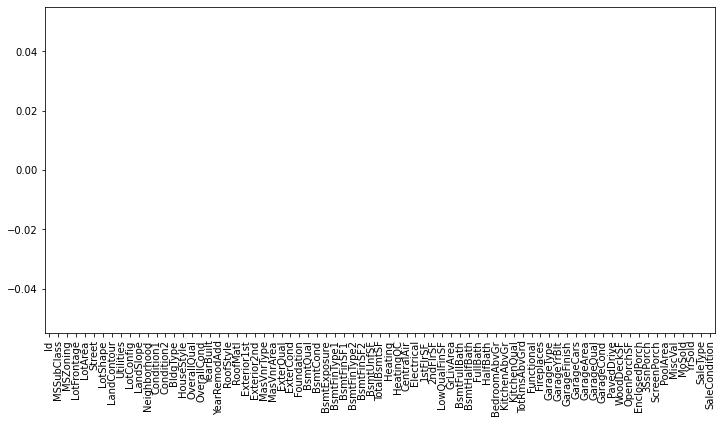

In [19]:
missing_counts = test_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

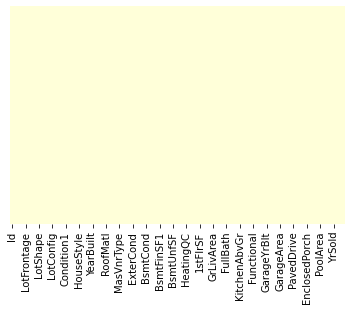

In [20]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [21]:
test_df.shape

(1459, 75)

In [24]:
test_df.drop('Id',axis=1, inplace=True)


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [26]:
## Handling Categorical Feature

In [27]:
df = pd.DataFrame(test_df)
categorical_features = df.select_dtypes(include=['object']).columns

In [28]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
len(categorical_features)

38

In [30]:
test_df.to_csv('formulatedtest.csv',index=False)